In [13]:
import pandas as pd
from pathlib import Path
import math
import statistics
from tqdm import tqdm
import numpy as np


In [14]:
pi = math.pi
TICKS_MAX = 2000
TICKS_MIN = 400
NUM_PEOPLE = 300

In [15]:
caminho = Path('empirical')
arquivos = list(caminho.iterdir())
infectados_media = [0]*TICKS_MAX
infectados_max = [float('-inf')]*TICKS_MAX
infectados_min = [float('inf')]*TICKS_MAX

suscetiveis_media = [0]*TICKS_MAX
suscetiveis_max = [float('-inf')]*TICKS_MAX
suscetiveis_min = [float('inf')]*TICKS_MAX

mortos_media = [0]*TICKS_MAX
mortos_max = [float('-inf')]*TICKS_MAX
mortos_min = [float('inf')]*TICKS_MAX

recuperados_media = [0]*TICKS_MAX
recuperados_max = [float('-inf')]*TICKS_MAX
recuperados_min = [float('inf')]*TICKS_MAX

quantidade_arquivos = 0
# infectados_min = np.full(2000, np.inf)
quantidade_ticks = []

with tqdm(total=len(arquivos), desc="Processando elementos", unit="elemento") as pbar:
    for i, arquivo in enumerate(arquivos):
        #lendo o arquivo
#         print(arquivo)
        simulacao = pd.read_csv(arquivo, sep=',')

        #obtendo o numero de ticks
        df_mod_300 = simulacao[simulacao.index % NUM_PEOPLE == 0]
        ticks = df_mod_300['Tick'].to_numpy()
        pbar.update(1)
        if len(ticks) < TICKS_MIN:
            continue
#         print(len(ticks))
        quantidade_ticks.append(len(ticks) - 30)

        
        quantidade_arquivos+=1
        infectados = 0
        suscetiveis = 0
        mortos = 0
        recuperados = 0
        infectados_array = []
        suscetiveis_array = []
        mortos_array = []
        recuperados_array = []
        for tick in ticks:
            simulacao_tick = simulacao[simulacao["Tick"]==tick]
            # display(simulacao_tick1)
            contagem_tick = simulacao_tick["State"].value_counts()
            for status, count in contagem_tick.items():
                if status == 'infected':
                    infectados = count

                if status == 'susceptible':
                    suscetiveis = count

                if status == 'dead':
                    mortos = count

                if status == 'recovered':
                    recuperados = count
    #         print(infectados, suscetiveis, mortos, recuperados)
            infectados_array.append(infectados)
            suscetiveis_array.append(suscetiveis)
            mortos_array.append(mortos)
            recuperados_array.append(recuperados)
    #     print(infectados_array)
    #     print(suscetiveis_array)
    #     print(mortos_array)
    #     print(recuperados_array)
        ultimo_indice = len(ticks) - 1
        for tick2 in range(ultimo_indice,TICKS_MAX -1):
            infectados_array.append(infectados_array[-1])
            suscetiveis_array.append(suscetiveis_array[-1])
            mortos_array.append(mortos_array[-1])
            recuperados_array.append(recuperados_array[-1])


        for j, infectado in enumerate(infectados_array):
            if infectado>infectados_max[j]:
                infectados_max[j] = infectado
            if infectado<infectados_min[j]:
                infectados_min[j]=infectado
            infectados_media[j]+=infectado

        for j, suscetivel in enumerate(suscetiveis_array):
            if suscetivel>suscetiveis_max[j]:
                suscetiveis_max[j] = suscetivel
            if suscetivel<suscetiveis_min[j]:
                suscetiveis_min[j]=suscetivel
            suscetiveis_media[j]+=suscetivel

        for j, morto in enumerate(mortos_array):
            if morto>mortos_max[j]:
                mortos_max[j] = morto
            if morto<mortos_min[j]:
                mortos_min[j]=morto
            mortos_media[j]+=morto

        for j, recuperado in enumerate(recuperados_array):
            if recuperado>recuperados_max[j]:
                recuperados_max[j] = recuperado
            if recuperado<recuperados_min[j]:
                recuperados_min[j]=recuperado
            recuperados_media[j]+=recuperado
    #     print(mortos_array)
    #     print(infectados_array)
    print(quantidade_ticks)
      


Processando elementos: 100%|███████████████████████████████████████████████████| 228/228 [05:00<00:00,  1.32s/elemento]

[1254, 1312, 1389, 1311, 1396, 1273, 1440, 1272, 1712, 1278, 1250, 1256, 1262, 1247, 1491, 1362, 1743, 1764, 1327, 1347, 1265, 1268, 1259, 1481, 1158, 1596, 1432, 1192, 1233, 1282, 1704, 1257, 1477, 1310, 1285, 1377, 1310, 1157, 1427, 1448, 1350, 1373, 1297, 1383, 1106, 1450, 1645, 1322, 1345, 1813, 1448, 1427, 1154, 1220, 1132, 1167, 1367, 1308, 1340, 1397, 1758, 1300, 1347, 1233, 1104, 1415, 1210, 1414, 1215, 1378, 1407, 1271, 1199, 1344, 1426, 1381, 1400, 1652, 1308, 1768, 1270, 1264, 1239, 1226, 1422, 1587, 1227, 1307, 1234, 1360, 1402, 1400, 1342, 1504, 1443, 1376, 1219, 1212, 1209, 1180, 1325, 1275, 1504, 1559, 1200, 1477, 1428, 1377, 1282, 1402, 1330, 1244, 1160, 1513, 1369, 1284, 1424, 1327, 1425, 1401, 1392, 1470, 1441, 1374, 1551, 1435, 1288, 1241, 1213, 1243, 1265, 1397, 1246, 1275, 1307, 1293, 1375, 1228, 1330, 1215, 1261, 1170, 1449, 1406, 1360, 1597, 1345, 1520, 1397, 1743, 1233, 1294, 1336, 1265, 1338, 1538, 1197, 1640, 1547, 1341, 1349, 1241, 1433, 1300, 1337, 1554, 133

In [16]:
###Calculando estatisticas dos ticks
# Exemplo de vetor (lista)
vetor = [10, 20, 30, 40, 50]

# Calculando os valores
min_valor = min(quantidade_ticks)                # Mínimo
max_valor = max(quantidade_ticks)                # Máximo
media_valor = sum(quantidade_ticks) / len(quantidade_ticks)  # Média (ou usando statistics.mean())
std_valor = statistics.stdev(quantidade_ticks)   # Desvio padrão
var_valor = statistics.variance(quantidade_ticks)   # Variância

# Exibindo os resultados
print(f"Mínimo ticks: {min_valor}")
print(f"Máximo ticks: {max_valor}")
print(f"Média ticks: {media_valor}")
print(f"Desvio padrão: {std_valor}")
print(f"Variância: {var_valor}")

Mínimo ticks: 1104
Máximo ticks: 1856
Média ticks: 1355.5530973451328
Desvio padrão: 146.34986790157433
Variância: 21418.28383480826


In [17]:
# infectados_media = [elemento - pi for elemento in infectados_media]
infectados_min = [x for x in infectados_min if x != float('inf')]
infectados_max = [x for x in infectados_max if x != float('-inf')]
# infectados_media = [x for x in infectados_media if x != 0]
# vetor_substituido = [99 if elemento == 20 else elemento for elemento in vetor]
infectados_media = [elemento / quantidade_arquivos for elemento in infectados_media]

suscetiveis_min = [x for x in suscetiveis_min if x != float('inf')]
suscetiveis_max = [x for x in suscetiveis_max if x != float('-inf')]
# suscetiveis_media = [x for x in suscetiveis_media if x != 0]
suscetiveis_media = [elemento / quantidade_arquivos for elemento in suscetiveis_media]

mortos_min = [x for x in mortos_min if x != float('inf')]
mortos_max = [x for x in mortos_max if x != float('-inf')]
# mortos_media = [x for x in mortos_media if x != 0]
mortos_media = [elemento / quantidade_arquivos for elemento in mortos_media]

recuperados_min = [x for x in recuperados_min if x != float('inf')]
recuperados_max = [x for x in recuperados_max if x != float('-inf')]
# recuperados_media = [x for x in recuperados_media if x != 0]
recuperados_media = [elemento / quantidade_arquivos for elemento in recuperados_media]

# print("infectados", infectados_media)
# print("suscetiveis", suscetiveis_media)
# print("mortos", mortos_media)
# print("recuperados", recuperados_media)


        
        
    


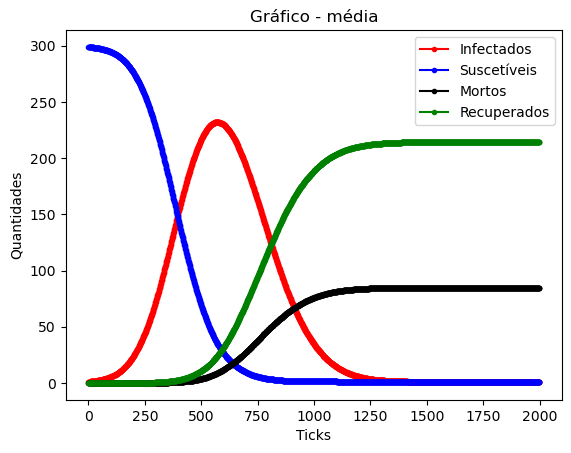

In [21]:
import matplotlib.pyplot as plt

# Criando o eixo X (índices)
x1 = list(range(min(len(infectados_media),len(suscetiveis_media),len(mortos_media),len(recuperados_media))))
x2 = list(range(min(len(infectados_min),len(suscetiveis_min),len(mortos_min), len(recuperados_min))))
x3 = list(range(min(len(infectados_max),len(suscetiveis_max),len(mortos_max),len(recuperados_max))))


x11 = list(range(len(infectados_media)))
x21 = list(range(len(infectados_min)))
x31 = list(range(len(infectados_max)))

x12 = list(range(len(suscetiveis_media)))
x22 = list(range(len(suscetiveis_min)))
x32 = list(range(len(suscetiveis_max)))

x13 = list(range(len(mortos_media)))
x23 = list(range(len(mortos_min)))
x33 = list(range(len(mortos_max)))

x14 = list(range(len(recuperados_media)))
x24 = list(range(len(recuperados_min)))
x34 = list(range(len(recuperados_max)))


plt.style.use('default')

# Plotando os 3 arrays no mesmo gráfico com cores diferentes
plt.plot(x11, infectados_media, label='Infectados', marker='.', color='red' )
# plt.plot(x21, infectados_min, marker='.', color='red', alpha=0.1, linewidth=0.1)
# plt.plot(x31, infectados_max, marker='.', color='red', alpha=0.1, linewidth=0.1)

plt.plot(x12, suscetiveis_media, label='Suscetíveis', marker='.', color='blue')
# plt.plot(x22, suscetiveis_min, marker='.', color='blue', alpha=0.1, linewidth=0.1)
# plt.plot(x32, suscetiveis_max, marker='.', color='blue', alpha=0.1, linewidth=0.1)

plt.plot(x13, mortos_media, label='Mortos', marker='.', color='black')
# plt.plot(x23, mortos_min, marker='.', color='white', alpha=0.1, linewidth=0.1)
# plt.plot(x33, mortos_max, marker='.', color='white', alpha=0.1, linewidth=0.1)

plt.plot(x14, recuperados_media, label='Recuperados', marker='.', color='green')
# plt.plot(x24, recuperados_min, marker='.', color='green', alpha=0.1, linewidth=0.1)
# plt.plot(x34, recuperados_max, marker='.', color='green', alpha=0.1, linewidth=0.1)

# plt.plot(x, infectados_array, label='Infectados', marker='.', color='red')
# plt.plot(x, suscetiveis_array, label='Suscetíveis', marker='.', color='blue')
# plt.plot(x, mortos_array, label='Mortos', marker='.', color='white')
# plt.plot(x, recuperados_array, label='Recuperados', marker='.', color='green')



# Adicionando título e rótulos
plt.title("Gráfico - média")
plt.xlabel("Ticks")
plt.ylabel("Quantidades")

# Exibindo a legenda para diferenciar os arrays
plt.legend()

# Mostrando o gráfico
plt.show()

### plotantado todos os dados juntos

In [22]:
caminho = Path('empirical')
arquivos = list(caminho.iterdir())


quantidade_arquivos = 0
infectados_todos = []
suscetiveis_todos = []
mortos_todos = []
recuperados_todos = []


with tqdm(total=len(arquivos), desc="Processando elementos", unit="elemento") as pbar:
    for i, arquivo in enumerate(arquivos):
#         print(arquivo)
        simulacao = pd.read_csv(arquivo, sep=',')
        df_mod_300 = simulacao[simulacao.index % 300 == 0]
        ticks = df_mod_300['Tick'].to_numpy()
        pbar.update(1)
        if len(ticks) < TICKS_MIN:
            continue
#         print(len(ticks))
        quantidade_arquivos+=1
        

        infectados = 0
        suscetiveis = 0
        mortos = 0
        recuperados = 0
        infectados_array = []
        suscetiveis_array = []
        mortos_array = []
        recuperados_array = []

        for tick in ticks:
            simulacao_tick = simulacao[simulacao["Tick"]==tick]
            contagem_tick = simulacao_tick["State"].value_counts()
            for status, count in contagem_tick.items():
                if status == 'infected':
                    infectados = count

                if status == 'susceptible':
                    suscetiveis = count

                if status == 'dead':
                    mortos = count

                if status == 'recovered':
                    recuperados = count
    #         print(infectados, suscetiveis, mortos, recuperados)
            infectados_array.append(infectados)
            suscetiveis_array.append(suscetiveis)
            mortos_array.append(mortos)
            recuperados_array.append(recuperados)
    #     print(infectados_array)
    #     print(suscetiveis_array)
    #     print(mortos_array)
    #     print(recuperados_array)

        ultimo_indice = len(ticks) - 1
        for tick2 in range(ultimo_indice,TICKS_MAX -1):
            infectados_array.append(infectados_array[-1])
            suscetiveis_array.append(suscetiveis_array[-1])
            mortos_array.append(mortos_array[-1])
            recuperados_array.append(recuperados_array[-1])
        infectados_todos.append(infectados_array)
        suscetiveis_todos.append(suscetiveis_array)
        mortos_todos.append(mortos_array)
        recuperados_todos.append(recuperados_array)


Processando elementos: 100%|███████████████████████████████████████████████████| 228/228 [04:49<00:00,  1.27s/elemento]


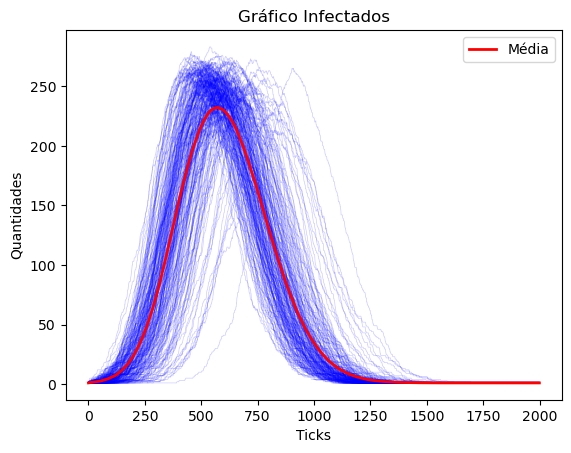

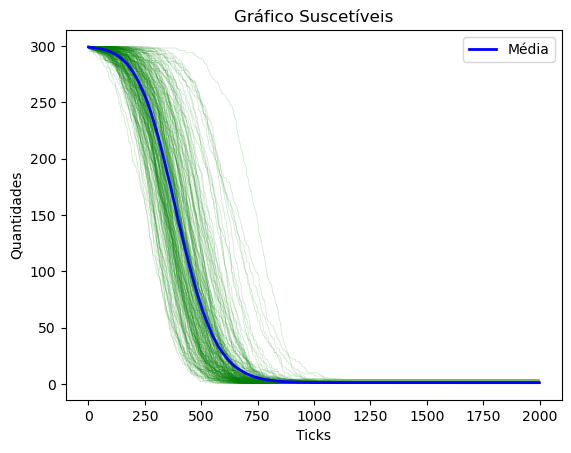

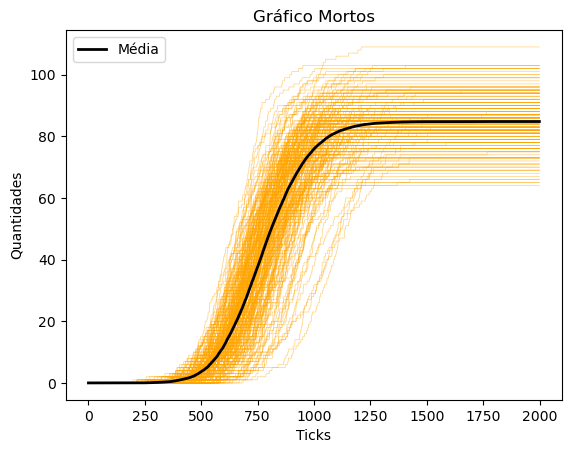

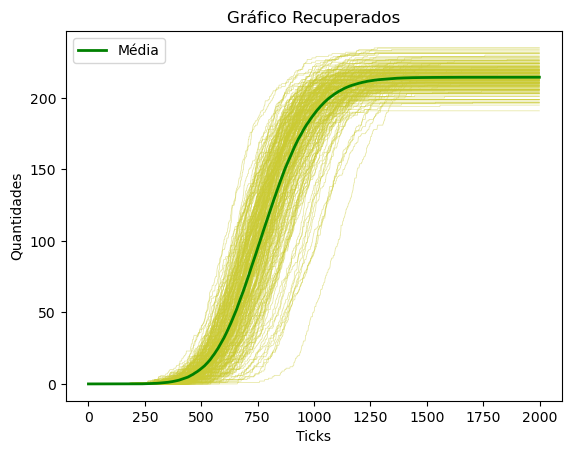

In [23]:
##plotando infectados
plt.style.use('default')
x1 = list(range(len(infectados_media)))
for infected in infectados_todos:
    x = list(range(len(infected)))
       #CBCB33
    plt.plot(x, infected, color='blue', alpha = 0.2, linewidth = 0.5)
plt.plot(x1, infectados_media, label='Média', color = 'red', linewidth = 2)

plt.title("Gráfico Infectados")
plt.xlabel("Ticks")
plt.ylabel("Quantidades")
plt.legend()
plt.show()



##plotando suscetiveis
plt.style.use('default')
x1 = list(range(len(suscetiveis_media)))
for susceptible in suscetiveis_todos:
    x = list(range(len(susceptible)))
    #CBCB33
    plt.plot(x, susceptible, color='green', alpha = 0.2, linewidth = 0.5)
plt.plot(x1, suscetiveis_media, label='Média', color = 'blue', linewidth = 2)

plt.title("Gráfico Suscetíveis")
plt.xlabel("Ticks")
plt.ylabel("Quantidades")
plt.legend()
plt.show()



##plotando mortos
plt.style.use('default')
x1 = list(range(len(mortos_media)))
for deads in mortos_todos:
    x = list(range(len(deads)))
    #CBCB33
    plt.plot(x, deads, color='orange', alpha = 0.5, linewidth = 0.5)
plt.plot(x1, mortos_media, label='Média', color = 'black', linewidth = 2)

plt.title("Gráfico Mortos")
plt.xlabel("Ticks")
plt.ylabel("Quantidades")
plt.legend()
plt.show()

##plotando recuperdaos
plt.style.use('default')
x1 = list(range(len(recuperados_media)))
for recovered in recuperados_todos:
    x = list(range(len(recovered)))
    #CBCB33
    plt.plot(x, recovered, color='#CBCB33', alpha = 0.5, linewidth = 0.5)
plt.plot(x1, recuperados_media, label='Média', color = 'green', linewidth = 2)

plt.title("Gráfico Recuperados")
plt.xlabel("Ticks")
plt.ylabel("Quantidades")
plt.legend()

plt.show()

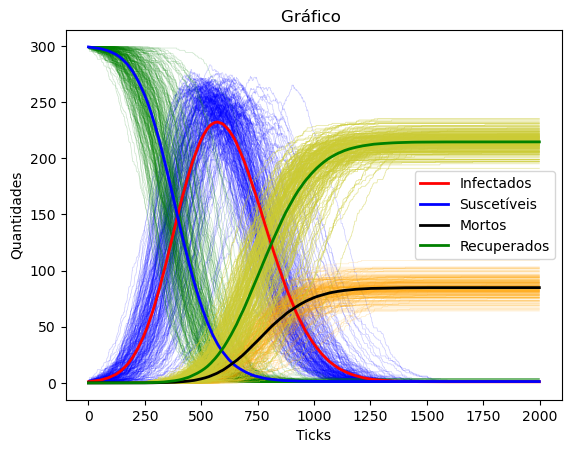

In [24]:
###Plotando todos juntos


x1 = list(range(len(infectados_media)))
for infected in infectados_todos:
    x = list(range(len(infected)))
       #CBCB33
    plt.plot(x, infected, color='blue', alpha = 0.2, linewidth = 0.5)
# plt.plot(x1, infectados_media, label='Infectados', color = 'red', linewidth = 2)


x1 = list(range(len(suscetiveis_media)))
for susceptible in suscetiveis_todos:
    x = list(range(len(susceptible)))
    #CBCB33
    plt.plot(x, susceptible, color='green', alpha = 0.2, linewidth = 0.5)
# plt.plot(x1, suscetiveis_media, label='Suscetíveis', color = 'blue', linewidth = 2)


x1 = list(range(len(mortos_media)))
for deads in mortos_todos:
    x = list(range(len(deads)))
    #CBCB33
    plt.plot(x, deads, color='orange', alpha = 0.2, linewidth = 0.5)
# plt.plot(x1, mortos_media, label='Mortos', color = 'black', linewidth = 2)



x1 = list(range(len(recuperados_media)))
for recovered in recuperados_todos:
    x = list(range(len(recovered)))
    #CBCB33
    plt.plot(x, recovered, color='#CBCB33', alpha = 0.5, linewidth = 0.5)
# plt.plot(x1, recuperados_media, label='Recuperados', color = 'green', linewidth = 2)


### Grafico medias
plt.plot(x1, infectados_media, label='Infectados', color = 'red', linewidth = 2)
plt.plot(x1, suscetiveis_media, label='Suscetíveis', color = 'blue', linewidth = 2)
plt.plot(x1, mortos_media, label='Mortos', color = 'black', linewidth = 2)
plt.plot(x1, recuperados_media, label='Recuperados', color = 'green', linewidth = 2)


plt.title("Gráfico ")
plt.xlabel("Ticks")
plt.ylabel("Quantidades")
plt.legend()

plt.show()


### Outras metricas - plotar recovery/death time para os mortos e recuperados em TODOS arquivos desse grafico, recuperar min, max, mean, std

In [26]:
## Olhar ultimo tick
caminho = Path('empirical')
arquivos = list(caminho.iterdir())

recoveries_time_deadP = []
recoveries_time_recoveredP = []
deaths_time_deadP = []
deaths_time_recoveredP = []
qtd_deads = []
qtd_recovered = []
qtd_susceptibles = []

with tqdm(total=len(arquivos), desc="Processando elementos", unit="elemento") as pbar:
    for i, arquivo in enumerate(arquivos):
        simulacao = pd.read_csv(arquivo, sep=',')
        df_mod_300 = simulacao[simulacao.index % NUM_PEOPLE == 0]
        ticks = df_mod_300['Tick'].to_numpy()
        ultimo_tick = ticks[-1]
        pbar.update(1)
        if len(ticks) < TICKS_MIN:
            continue
        quantidade_ticks.append(len(ticks) - 30)
        quantidade_arquivos+=1


        ## seperando os grupos(mortos e recuperados)
        df_last_tick = simulacao[simulacao["Tick"] == ultimo_tick]
        df_dead_people = df_last_tick[df_last_tick["State"] == 'dead']
        df_recovered_people = df_last_tick[df_last_tick['State'] == 'recovered']
        qtd_deads.append(len(df_dead_people))
        qtd_recovered.append(len(df_recovered_people))

        #separando o grupo suscetiveis, para outras metricas.
        df_susceptible_people = df_last_tick[df_last_tick["State"] == 'susceptible']
        qtd_susceptibles.append(len(df_susceptible_people))

        death_time_deadP = df_dead_people['Death Time'].tolist()
        recovery_time_deadP = df_dead_people['Recovery Time'].tolist()

        death_time_recoveredP = df_recovered_people['Death Time'].tolist()
        recovery_time_recoveredP = df_recovered_people['Recovery Time'].tolist()

        #concetando os vetores
        deaths_time_deadP += death_time_deadP
        recoveries_time_deadP += recovery_time_recoveredP

        deaths_time_recoveredP += death_time_recoveredP
        recoveries_time_recoveredP += recovery_time_recoveredP



    #     print('Pessoas que morreram:')
    #     print(f'death_time :{statistics.mean(death_time_deadP)}')
    #     print(f'recovered_time : {statistics.mean(recovery_time_deadP)}\n')
    #     print('Pessoas que recuperaram:')
    #     print(f'death_time :{statistics.mean(death_time_recoveredP)}')
    #     print(f'recovered_time :{statistics.mean(recovery_time_recoveredP)}\n')





Processando elementos: 100%|███████████████████████████████████████████████████| 228/228 [00:33<00:00,  6.74elemento/s]


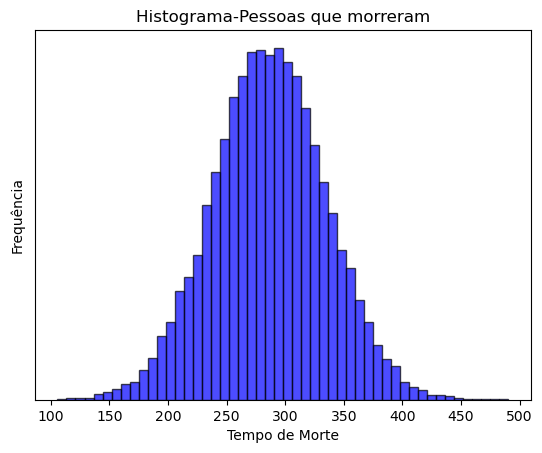

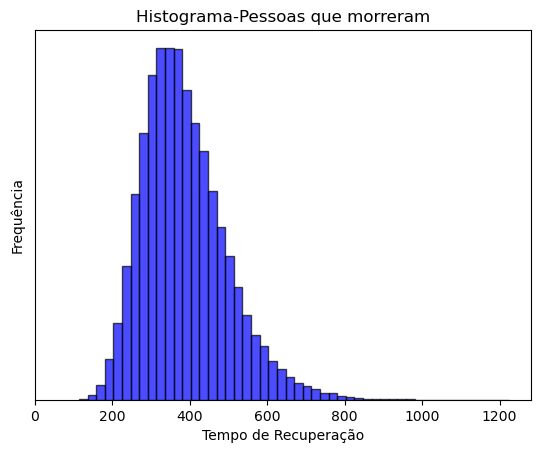

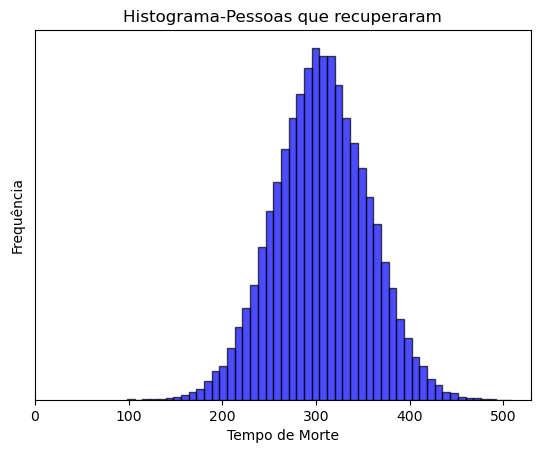

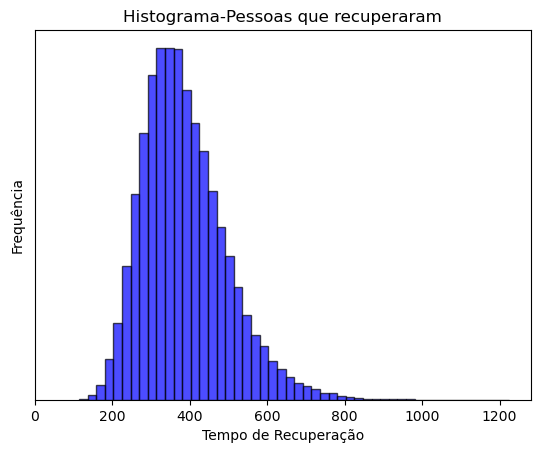

In [27]:
# plotando os histogramas

plt.hist(deaths_time_deadP, bins=50, color='blue', alpha=0.7, edgecolor='black')

plt.yticks([])
plt.title("Histograma-Pessoas que morreram")
plt.xlabel("Tempo de Morte")
plt.ylabel("Frequência")
plt.show()

plt.hist(recoveries_time_deadP, bins=50, color='blue', alpha=0.7, edgecolor='black')

plt.yticks([])
plt.xlim(left=0)
plt.title("Histograma-Pessoas que morreram")
plt.xlabel("Tempo de Recuperação")
plt.ylabel("Frequência")
plt.show()

plt.hist(deaths_time_recoveredP, bins=50, color='blue', alpha=0.7, edgecolor='black')

plt.yticks([])
plt.xlim(left=0) 
plt.title("Histograma-Pessoas que recuperaram")
plt.xlabel("Tempo de Morte")
plt.ylabel("Frequência")
plt.show()

plt.hist(recoveries_time_recoveredP, bins=50, color='blue', alpha=0.7, edgecolor='black')

plt.yticks([])
plt.xlim(left=0)
plt.title("Histograma-Pessoas que recuperaram")
plt.xlabel("Tempo de Recuperação")
plt.ylabel("Frequência")
plt.show()






### outras metricas ⁠maximo de infectados (a ideia eh rodar varias vezes e ver como esse numero varia) e quando ele ocorre (valor esperado do seu tick)

In [28]:
max_infectados = []

for infected in infectados_todos:
    max_infectados.append(max(infected))

# Calculando os valores
min_valor = min(max_infectados)                # Mínimo
max_valor = max(max_infectados)                # Máximo
media_valor = sum(max_infectados) / len(max_infectados)  # Média (ou usando statistics.mean())
std_valor = statistics.stdev(max_infectados)   # Desvio padrão
var_valor = statistics.variance(max_infectados)   # Variância

# Exibindo os resultados
print('Infectados: ')
print(f"Menor máximo: {min_valor}")
print(f"Maior máximo: {max_valor}")
print(f"Média máximos: {media_valor}")
print(f"Desvio padrão: {std_valor}")
print(f"Variância: {var_valor}")    

Infectados: 
Menor máximo: 204
Maior máximo: 283
Média máximos: 254.49115044247787
Desvio padrão: 13.341744397172684
Variância: 178.0021435594887


 ### quantos nao infectados nem mortos sobram (deve ser um numero baixo, como ele varia)

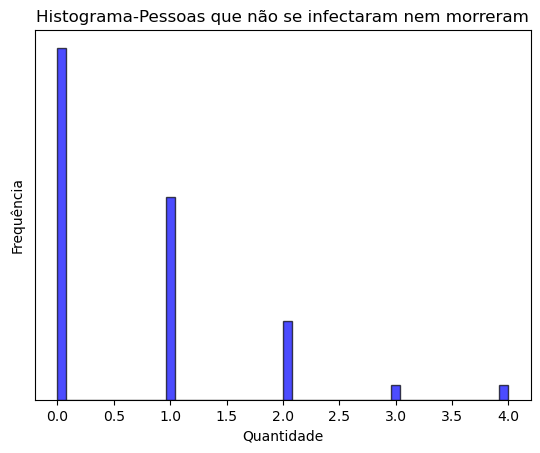

Pessoas que não se infectaram nem morreram:
Mínimo: 0
Máximo: 4
Média: 0.6991150442477876
Desvio padrão: 0.9226527528065765
Variância: 0.8512881022615536


In [29]:
plt.hist(qtd_susceptibles, bins=50, color='blue', alpha=0.7, edgecolor='black')

plt.yticks([])
plt.title("Histograma-Pessoas que não se infectaram nem morreram")
plt.xlabel("Quantidade")
plt.ylabel("Frequência")
plt.show()

# Calculando os valores
min_valor = min(qtd_susceptibles)                # Mínimo
max_valor = max(qtd_susceptibles)                # Máximo
media_valor = sum(qtd_susceptibles) / len(qtd_susceptibles)  # Média (ou usando statistics.mean())
std_valor = statistics.stdev(qtd_susceptibles)   # Desvio padrão
var_valor = statistics.variance(qtd_susceptibles)   # Variância

# Exibindo os resultados
print('Pessoas que não se infectaram nem morreram:')
print(f"Mínimo: {min_valor}")
print(f"Máximo: {max_valor}")
print(f"Média: {media_valor}")
print(f"Desvio padrão: {std_valor}")
print(f"Variância: {var_valor}")    

### Razão mortos/recuperados

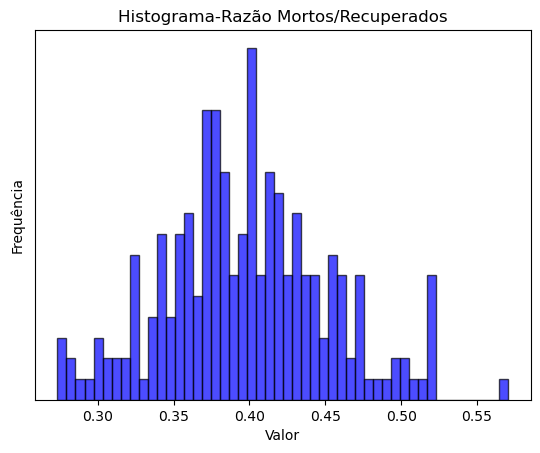

Razão Mortes/Infectados:
Mínimo razão: 0.27350427350427353
Máximo razão: 0.5706806282722513
Média razão: 0.3974290514151294
Desvio padrão: 0.05479088937025657
Variância: 0.0030020415579836944


In [30]:
import matplotlib.pyplot as plt
import statistics

razao_todos = []
razao_media = []

# Iterando pelos dados de mortos e recuperados
for i, deads in enumerate(qtd_deads):
    if isinstance(deads, (list, tuple)) and isinstance(qtd_recovered[i], (list, tuple)):
        # Se ambos forem listas ou tuplas, use o zip para calcular a razão
        razao = [a / b if b != 0 else 0 for a, b in zip(deads, qtd_recovered[i])]  # Evitando divisão por zero
    else:
        # Caso contrário, faça uma divisão simples
        if qtd_recovered[i] != 0:  # Evitando divisão por zero
            razao = deads / qtd_recovered[i]
        else:
            razao = 0  # Definindo como 0 se não houver recuperados
    
    # Salvando os resultados
    razao_todos.append(razao)

# Supondo que "razao" seja uma lista no final do loop para plotar o histograma
plt.hist(razao_todos, bins=50, color='blue', alpha=0.7, edgecolor='black')

plt.yticks([])
plt.title("Histograma-Razão Mortos/Recuperados")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

# Calculando os valores
if isinstance(razao_todos, list):  # Certificando-se de que razao é uma lista
    min_valor = min(razao_todos)                # Mínimo
    max_valor = max(razao_todos)                # Máximo
    media_valor = sum(razao_todos) / len(razao_todos)  # Média (ou usando statistics.mean())
    std_valor = statistics.stdev(razao_todos)   # Desvio padrão
    var_valor = statistics.variance(razao_todos)   # Variância

    # Exibindo os resultados
    print('Razão Mortes/Infectados:')
    print(f"Mínimo razão: {min_valor}")
    print(f"Máximo razão: {max_valor}")
    print(f"Média razão: {media_valor}")
    print(f"Desvio padrão: {std_valor}")
    print(f"Variância: {var_valor}")


# ##plotando razao
# plt.style.use('default')
# x1 = list(range(len(razao_media)))
# for ratio in razao_todos:
#     x = list(range(len(ratio)))
#     #CBCB33
#     plt.plot(x, ratio, color='orange', alpha = 0.5, linewidth = 0.5)
# plt.plot(x1, razao_media, label='Média', color = 'black', linewidth = 2)

# plt.title("Gráfico - Razão Mortos/Recuperados")
# plt.xlabel("Ticks")
# plt.ylabel("Valor")
# plt.legend()
# plt.show()
    

### situações atípicas

In [32]:
## Olhar ultimo tick
caminho = Path('empirical')
arquivos = list(caminho.iterdir())
quantidade_ticks = []
qtd_deads = []
qtd_recovered = []
qtd_susceptibles = []
qtd_infected = []

with tqdm(total=len(arquivos), desc="Processando elementos", unit="elemento") as pbar:
    for i, arquivo in enumerate(arquivos):
        simulacao = pd.read_csv(arquivo, sep=',')
        df_mod_300 = simulacao[simulacao.index % NUM_PEOPLE == 0]
        ticks = df_mod_300['Tick'].to_numpy()
        ultimo_tick = ticks[-1]
        pbar.update(1)
        if len(ticks) > TICKS_MIN:
            continue
        quantidade_ticks.append(len(ticks) - 30)
        quantidade_arquivos+=1

        ## seperando os grupos(mortos e recuperados)
        df_last_tick = simulacao[simulacao["Tick"] == ultimo_tick]
        df_dead_people = df_last_tick[df_last_tick["State"] == 'dead']
        df_recovered_people = df_last_tick[df_last_tick['State'] == 'recovered']
        try:
            df_infected_people = df_last_tick(df_last_tick['State'] == 'infected')
        except:
            pass
        
        try:
            df_susceptibles_people = df_last_tick(df_last_tick['State'] == 'susceptible')
        except:
            pass
        qtd_deads.append(len(df_dead_people))
        qtd_recovered.append(len(df_recovered_people))
        try:
            qtd_infected.append(len(df_infected_people))
        except:
            pass
        try:
            qtd_susceptibles.append(len(df_susceptibles_people))
        except:
            pass
        
print(qtd_deads)
print(qtd_recovered)
print(qtd_infected)
print(qtd_susceptibles)

Processando elementos: 100%|███████████████████████████████████████████████████| 228/228 [00:31<00:00,  7.34elemento/s]

[1, 0]
[0, 1]
[]
[]


In [34]:
print(f'Quatidade de mortos: {qtd_deads}')
print(f'Quantidade de recupedados: {qtd_recovered}')
print(f'Quantidade de infectados: {qtd_infected}')
print(f'Quantidade de suscetíveis: {qtd_susceptibles}')

Quatidade de mortos: [1, 0]
Quantidade de recupedados: [0, 1]
Quantidade de infectados: []
Quantidade de suscetíveis: []


In [33]:
print(quantidade_ticks)
min_valor = min(quantidade_ticks)                # Mínimo
max_valor = max(quantidade_ticks)                # Máximo
media_valor = sum(quantidade_ticks) / len(quantidade_ticks)  # Média (ou usando statistics.mean())
std_valor = statistics.stdev(quantidade_ticks)   # Desvio padrão
var_valor = statistics.variance(quantidade_ticks)   # Variância

# Exibindo os resultados
print('Ticks casos atipicos:')
print(f"Mínimo: {min_valor}")
print(f"Máximo: {max_valor}")
print(f"Média: {media_valor}")
print(f"Desvio padrão: {std_valor}")
print(f"Variância: {var_valor}")


[209, 252]
Ticks casos atipicos:
Mínimo: 209
Máximo: 252
Média: 230.5
Desvio padrão: 30.405591591021544
Variância: 924.5


# Ignora daqui pra baixo

In [88]:
caminho = Path('covid')
arquivos = caminho.iterdir()
for arquivo in arquivos:
    print(arquivo)
    simulacao = pd.read_csv(arquivo, sep=',')
# simulacao = pd.read_csv(r'population_info.csv', sep=',')
# display(simulacao)
    df_mod_300 = simulacao[simulacao.index % 300 == 0]

# display(df_mod_300)
    ticks = df_mod_300['Tick'].to_numpy()
    print(ticks)
# simulacao_tick = simulacao[simulacao["Tick"]==1011]
# contagem_status = simulacao_tick["State"].value_counts()
# # print(contagem_status)
# for status, count in contagem_status.items():
#     print(status, count)
#     globals()[f'numero_de_{status}'] = count

# Agora você tem variáveis como:
# numero_de_infected, numero_de_susceptible, numero_de_dead, etc.

# # Exemplo de uso
# print(f"Numero de infectados: {numero_de_infected}")
# print(f"Numero de suscetíveis: {numero_de_susceptible}")
# status, count = simulacao_1011["State"].value_counts().items()
# print(status, count)

covid\population_info (1).csv
covid\population_info (10).csv
covid\population_info (11).csv
covid\population_info (12).csv
covid\population_info (13).csv
covid\population_info (14).csv
covid\population_info (15).csv
covid\population_info (16).csv
covid\population_info (17).csv
covid\population_info (18).csv
covid\population_info (19).csv
covid\population_info (2).csv
covid\population_info (20).csv
covid\population_info (21).csv
covid\population_info (22).csv
covid\population_info (23).csv
covid\population_info (24).csv
covid\population_info (25).csv
covid\population_info (26).csv
covid\population_info (27).csv
covid\population_info (28).csv
covid\population_info (29).csv
covid\population_info (3).csv
covid\population_info (30).csv
covid\population_info (31).csv
covid\population_info (32).csv
covid\population_info (33).csv
covid\population_info (34).csv
covid\population_info (35).csv
covid\population_info (36).csv
covid\population_info (37).csv
covid\population_info (38).csv
covid\popul

In [66]:
#pegar quantidade de pessoas infectadas, sucetiveis e mortas num tempo(tick) i
#tabela apenas de pessoas no tick i -> count infectad, susceptible e dead
infectados = 0
suscetiveis = 0
mortos = 0
recuperados = 0
infectados_array = []
suscetiveis_array = []
mortos_array = []
recuperados_array = []

for tick in ticks:
    simulacao_tick = simulacao[simulacao["Tick"]==tick]
    # display(simulacao_tick1)
    contagem_tick = simulacao_tick["State"].value_counts()
    for status, count in contagem_tick.items():
        if status == 'infected':
            infectados = count
            
        if status == 'susceptible':
            suscetiveis = count
            
        if status == 'dead':
            mortos = count
        
        if status == 'recovered':
            recuperados = count
    print(infectados, suscetiveis, mortos, recuperados)
    infectados_array.append(infectados)
    suscetiveis_array.append(suscetiveis)
    mortos_array.append(mortos)
    recuperados_array.append(recuperados)
print(infectados_array)
print(suscetiveis_array)
print(mortos_array)
print(recuperados_array)
    



1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
1 299 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
2 298 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
3 297 0 0
4 296 0 0
4 296 0 0
4 296 0 0
4 296 0 0
4 296 0 0
4 296 0 0
4 296 0 0
5 295 0 0
5 295 0 0
5 295 0 0
6 294 0 0
6 294 0 0
6 294 0 0
6 294 0 0
6 294 0 0
7 293 0 0
8 292 0 0
9 291 0 0


6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
6 1 161 132
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
5 1 161 133
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
4 1 161 134
3 1 161 135
3 1 161 135
3 1 161 135
3 1 161 135
3 1 161 135
3 1 161 135
3 1 161 135
3 1 161 135
3 1 161 135
2 1 161 136
2 1 161 136
2 1 161 136
2 1 161 136
2 1 161 136
2 1 161 136
2 1 161 136
2 1 161 136
2 1 161 136
2 1 

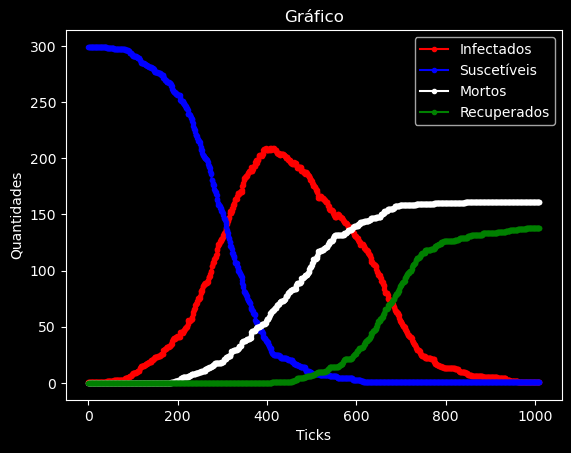

In [82]:
import matplotlib.pyplot as plt

# Supondo que você tenha 3 arrays
array1 = [10, 15, 20, 25, 30]
array2 = [12, 14, 18, 22, 26]
array3 = [11, 13, 19, 23, 27]

# Criando o eixo X (índices)
x = list(range(len(infectados_array)))
plt.style.use('dark_background')

# Plotando os 3 arrays no mesmo gráfico com cores diferentes
plt.plot(x, infectados_array, label='Infectados', marker='.', color='red')
plt.plot(x, suscetiveis_array, label='Suscetíveis', marker='.', color='blue')
plt.plot(x, mortos_array, label='Mortos', marker='.', color='white')
plt.plot(x, recuperados_array, label='Recuperados', marker='.', color='green')

# Adicionando título e rótulos
plt.title("Gráfico")
plt.xlabel("Ticks")
plt.ylabel("Quantidades")

# Exibindo a legenda para diferenciar os arrays
plt.legend()

# Mostrando o gráfico
plt.show()
